# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [59]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 3.2 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# Mounted at /content/drive for Google Colab to get required data from drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library for probability distribution and statistic data
import scipy.stats as stats

## Reading the Data into a DataFrame

In [6]:
# read the data from dataset using panda
df = pd.read_csv("/content/drive/MyDrive/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [42]:
# After successfull read the data, we can use head() function to view the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


**Observations:**

`Dataframe contains 6 columns. Data in each row have duration spent on the page and preferences of each user.`



In [8]:
# we can use the tail() function to view the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Observations:**

`Dataframe contains 6 columns. Data in each row have duration spent on the page and preferences of each user.`

In [9]:
# we can use the shape to get the rows and columns
df.shape
print("Rows:", df.shape[0])

print("columns:", df.shape[1])

Rows: 100
columns: 6


**Observations:**

`Dataframe contains 100 rows and 6 columns.`




In [10]:
# Use describe funtion to get statistical values for numerical values
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations:**

```
*   Average time spent by a user is 5.37 mintues.
*   Maximum time spent on the page is 10.71 minutes.
*   Minimum time spent on the page is 0.19 minutes.
```





In [13]:
# use describe function to get the statistical values for object variables
df.describe(include = 'object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


**Observations:**

```
*   Dataset have 4 objective type variables.
*   group column have 2 unique categories.
*   landing_page column have 2 unique categories.
*   converted column have 2 unique categories.
*   language_preferred column have 3 unique categories.

```





In [14]:
# use info function to get the missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**

```
*   Dataset have 4 objective type columns, 1 integer column and 1 float column.
*   There are no columns with null value/missing value in the data set.

```





In [15]:
# find null value in the dataset
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations:**

```
*   There is no missing value in the dataset.

```





In [16]:
# we can use duplicate function to find the duplicate data
dupData = df.duplicated()
dupSum = df.duplicated().sum()

print("Duplicate data:", dupData)

print("Duplicate rows:", dupSum)


Duplicate data: 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool
Duplicate rows: 0


**Observations:**

```
*   There are no duplicate data availblae in dataset.
```





### Univariate Analysis

In [17]:
# method to use seaborn countplot
def data_countplot(df, column):
    plt.figure(figsize=(5,5))
    ax=sns.countplot(data=df, x=column, order=df[column], palette="nipy_spectral", hue=column)
    for d in ax.patches:
        label = "{:.2f}%".format(100*d.get_height()/len(df[column]))
        x=d.get_x()+d.get_width()/2
        y=d.get_height()
        ax.annotate(label,(x,y),ha="center",va="center",xytext=(0, 5),textcoords="offset points")
    plt.show()

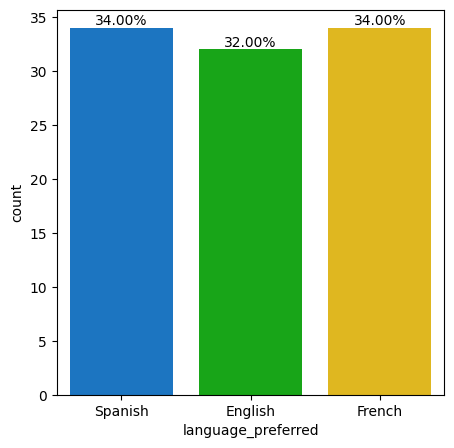

In [18]:
#To show count plot for language_preferred

data_countplot(df,"language_preferred")

**Observations:**

```
*   Above countplot shows for language preferred. 32% of users preferrs English and 34% of users preferrs Spanish, French.
```





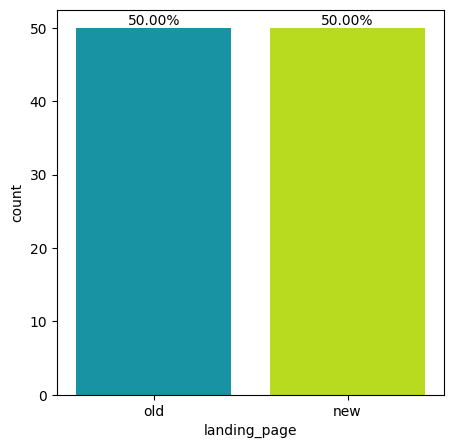

In [19]:
#To show count plot for landing_page

data_countplot(df,"landing_page")


**Observations:**

```
*   Above countplot shows for landing page. 50% of users using old landing page and 50% of users using new landing page.
```





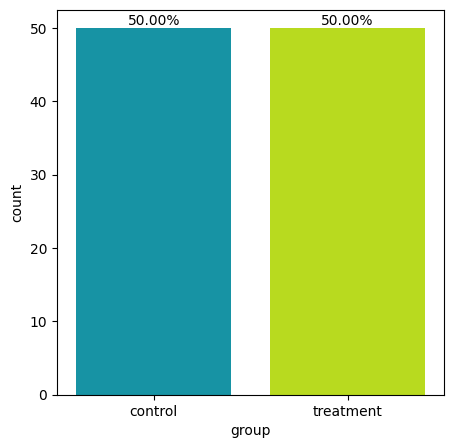

In [20]:
#To show count plot for group

data_countplot(df,"group")

**Observations:**

```
*   Above countplot shows for group. control and treatment group have 50% of users.
```





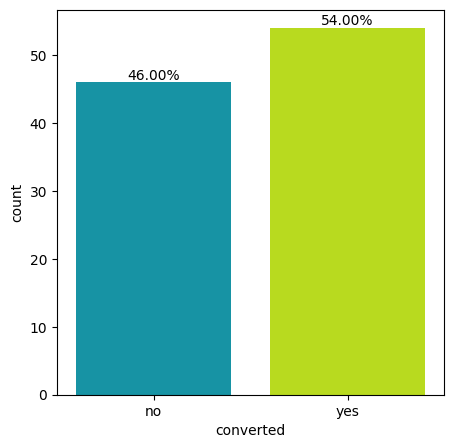

In [21]:
#To show count plot for converted

data_countplot(df,"converted")

**Observations:**

```
*   Above countplot shows for converted. 46% not converted and 54% converted.
```





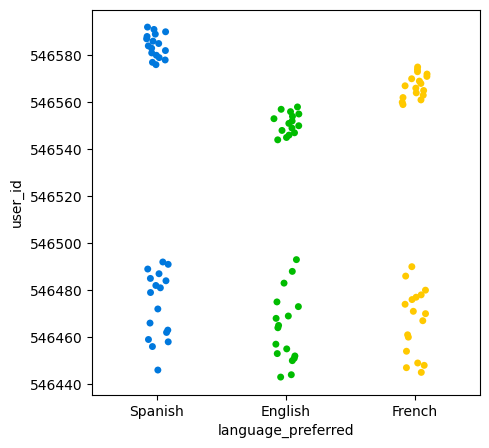

In [22]:
#stripplot for userid
plt.figure(figsize=(5,5)),
sns.stripplot(data=df, y="user_id", x="language_preferred", palette="nipy_spectral", hue= "language_preferred")
plt.xlabel('language_preferred')
plt.ylabel('user_id')
plt.show()

**Observations:**

```
*   Above plot show the user_id spread across the languages.
```





### Bivariate Analysis

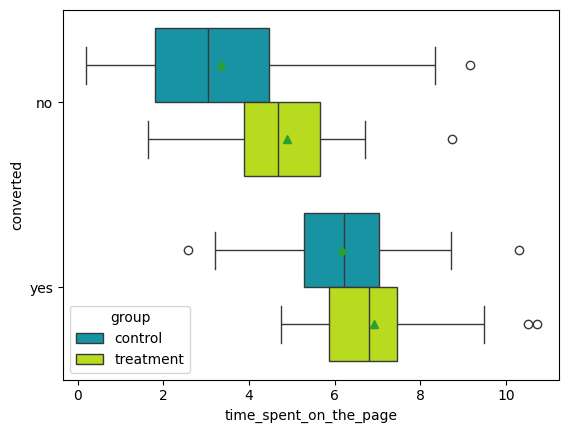

In [34]:
# Bivariate analysis using boxplot for "converted" and "time_spent_on_the_group"
sns.boxplot(data = df, y='converted', x='time_spent_on_the_page', showmeans= True, hue='group', palette='nipy_spectral')
plt.show()


**Observations:**

```
*   mean time spent by the group with converted YES is high compare to NO converted
```





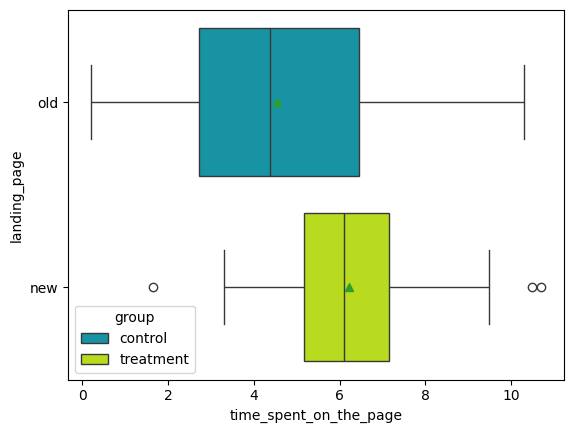

In [35]:
# Bivariate analysis using boxplot for "landing_page" and "time_spent_on_the_group"
sns.boxplot(data = df, y="landing_page", x="time_spent_on_the_page", hue=df["group"], showmeans=True, palette="nipy_spectral")
plt.show()


**Observations:**

```
*   mean time spent on new landing page is more than 6 mintues.
*   mean time spent on old landing page is more than 4 minutes.
*   few outliers on the timespent on new landing page.
```





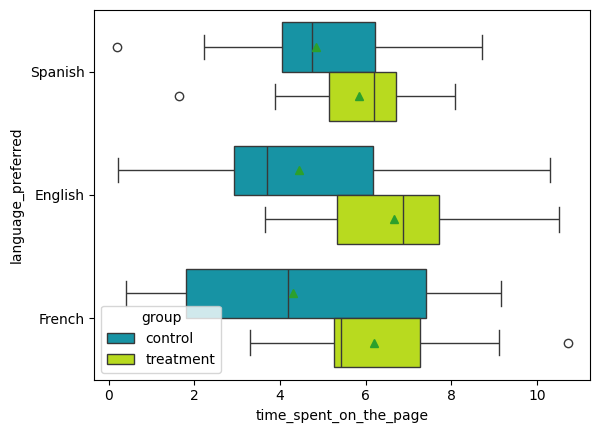

In [36]:
# Bivariate analysis using boxplot for "language_preferred" and "time_spent_on_the_group"
sns.boxplot(data = df, y="language_preferred", x="time_spent_on_the_page", hue=df["group"], showmeans=True, palette="nipy_spectral")
plt.show()


**Observations:**

```
*   few outliers in the time who prefers French or Spanish language.
*   mean time spent on old landing page is more than 4 minutes.
*   no outlier in the time who prefers English language.

```





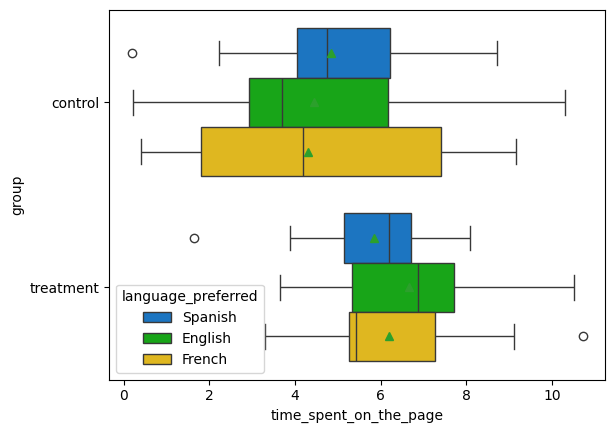

In [38]:
# Bivariate analysis using boxplot for "group" and "time_spent_on_the_group"
sns.boxplot(data = df, y="group", x="time_spent_on_the_page", hue=df["language_preferred"], showmeans=True, palette="nipy_spectral")
plt.show()


**Observations:**

```
*   there are outliers in the treatment group who prefers French or Spanish.
*   there is outlier in the control group who prefers English.
```





## 1. Do the users spend more time on the new landing page than the existing landing page?


### Perform Visual Analysis

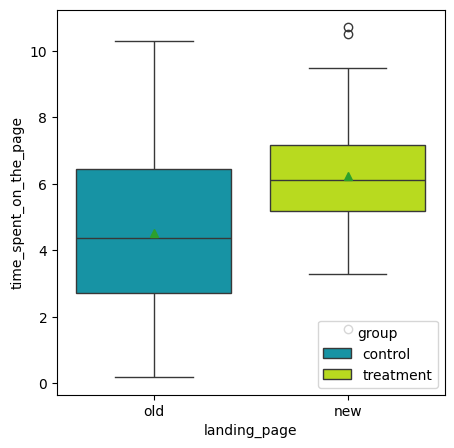

In [45]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x="landing_page", y="time_spent_on_the_page", hue=df["group"], showmeans=True, palette="nipy_spectral")
plt.show()

# Answear:Yes, the users spend more time on the new landing page than the existing landing page.

**Observations:**

```
*   mean time spent by the users on new landing page is high when compare to the mean time spent on old landing page.
*   there are few outliers the data of new landing page.
*   users of new landing page spending more than 6 mintues on the page.
*   users of old landing page spending more than 4.5 minutes on the page.


```





In [51]:
new_landing_page_mean = df[df["landing_page"] == "new"]["time_spent_on_the_page"].mean()
print("new landing page mean:",new_landing_page_mean)
old_landing_page_mean = df[df['landing_page'] == 'old']["time_spent_on_the_page"].mean()
print("old landing page mean:",old_landing_page_mean)
new_landing_page_std = df[df['landing_page'] == 'new']["time_spent_on_the_page"].std()
print("new landing page std:", new_landing_page_std)
old_landing_page_std = df[df['landing_page'] == 'old']["time_spent_on_the_page"].std()
print("old landing page std:",old_landing_page_std)



new landing page mean: 6.2232
old landing page mean: 4.532400000000001
new landing page std: 1.8170310387878263
old landing page std: 2.581974849306046


**Observations:**

```
*   Standard deviation of both the group is different.
*   mean time spent on new landing page is greater than old landing page.


```





### Step 1: Define the null and alternate hypotheses

n,o be the mean time for new and old page

**null hypotheses**
  
  H0: n = o, mean time spent on both the landing page is equal

**hypotheses**

  Ha: n > o, mean time spent on new landing page is greater than them mean time spent on old landing page

### Step 2: Select Appropriate test

As we are taking random samples for two different groups, two samples are from two independent populations.

we can select **two sample independent T-test**

### Step 3: Decide the significance level

significance level alpha = **0.05**

### Step 4: Collect and prepare data

In [52]:
new_landing_page_mean = df[df["landing_page"] == "new"]["time_spent_on_the_page"].mean()
print("new landing page mean:",new_landing_page_mean)
old_landing_page_mean = df[df['landing_page'] == 'old']["time_spent_on_the_page"].mean()
print("old landing page mean:",old_landing_page_mean)
new_landing_page_std = df[df['landing_page'] == 'new']["time_spent_on_the_page"].std()
print("new landing page std:", new_landing_page_std)
old_landing_page_std = df[df['landing_page'] == 'old']["time_spent_on_the_page"].std()
print("old landing page std:",old_landing_page_std)

new landing page mean: 6.2232
old landing page mean: 4.532400000000001
new landing page std: 1.8170310387878263
old landing page std: 2.581974849306046


### Step 5: Calculate the p-value

In [54]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df[df['landing_page'] == 'new']['time_spent_on_the_page'], df[df['landing_page'] == 'old']['time_spent_on_the_page'], equal_var = False, alternative='greater')
print("t_statistic:", t_statistic)
print("p_value:", p_value)

t_statistic: 3.7867702694199856
p_value: 0.0001392381225166549


**Observations:**

```
Here p-value is <0.05
```





### Step 6: Compare the p-value with $\alpha$

In [60]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than significance value. Reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than significance. Fail to reject the null hypothesis')

As the p-value 0.0001392381225166549 is less than significance value. Reject the null hypothesis.


### Step 7:  Draw inference

**As the p-value (0.00013) is less than the level of significance, we can reject the null hypothesis. We have evidence to support the claim that users spend more time on new landing page than old landing page.**

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

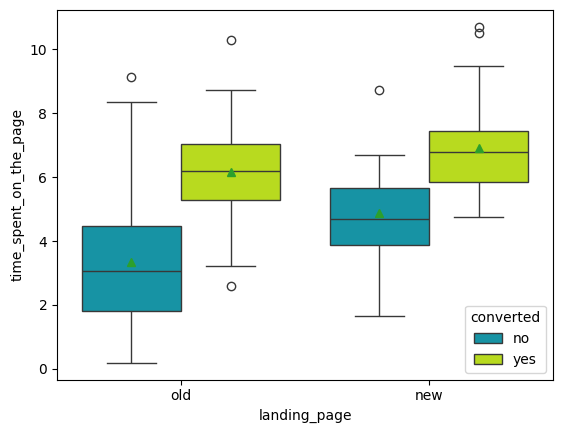

In [66]:
sns.boxplot(data = df, x="landing_page", y="time_spent_on_the_page", hue=df["converted"], showmeans=True, palette="nipy_spectral")
plt.show()

**Observations:**

```
*   mean time spent by the users on new landing page is high when compare to the mean time spent on old landing page.
*   few outliers in the new and old landing page for the converted status YES and NO
```





## 3. Is the conversion and preferred language are independent or related?



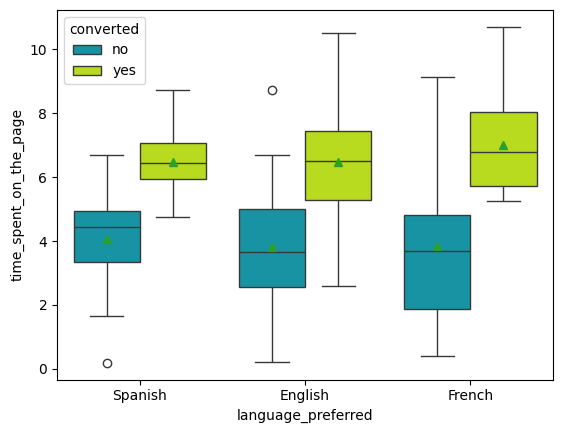

In [68]:
sns.boxplot(data = df, x="language_preferred", y="time_spent_on_the_page", hue=df["converted"], showmeans=True, palette="nipy_spectral")
plt.show()

**Observations:**

```
*   there are few outliers in the data of english and spanish language.
*   mean time spent by user and who get converted to YES is higher than the ysers who converted to NO.


```





## 4. Is the time spent on the new page same for the different language users?

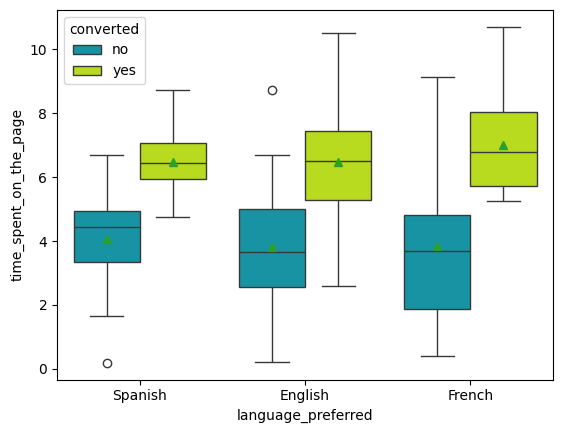

In [67]:
sns.boxplot(data = df, x="language_preferred", y="time_spent_on_the_page", hue=df["converted"], showmeans=True, palette="nipy_spectral")
plt.show()

**Observations:**

```
*   mean time of the engligh preferred users is high compared to other languages.
*   mean time spend by the user and who get converted status YES is higher than the users who get the converted status NO.
```





## Conclusion and Business Recommendations



*   Time spent by the different users with converted status YES is more than the users the converted status NO.
*   Conversion rate for new landing page is greater than the old landing page.
*   Mean time spent on the new page with respect to languages are equal.
*   User spending more time on the new landing page than the old landing page.





___